# Praca domowa 2

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')

In [12]:
transactions_df = pd.read_csv("allegro-api-transactions.csv")
transactions_df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


## Kodowanie zmiennych kategorycznych

### Target encoding

In [13]:
# target encoding dla it_location(względem price)
# tutaj przewaga tego nad one-hot jest taka, że mamy dużo(10^4) kategorii, 
# więc zastosowanie one-hot zwiększyłoby znacząco ramkę danych
# wadą target encodingu jest ovefitting, co wynika z tego, że liczymy średnią

df = transactions_df.copy()
encoder = ce.target_encoder.TargetEncoder()
df["it_location"] = pd.DataFrame(df["it_location"].str.lower())
df["it_location_encoded"] = encoder.fit_transform(df["it_location"], df["price"])
df[["it_location", "it_location_encoded"]]

,it_location,it_location_encoded
0,warszawa,84.132898
1,warszawa,84.132898
2,leszno,64.883187
3,wola krzysztoporska,35.433365
4,białystok,73.772916
...,...,...
420015,kraśnik,26.346402
420016,dzierżoniów,63.645927
420017,supraśl,18.682800
420018,poznań,104.254805


### One-hot encoding

In [33]:
one_hot = ce.one_hot.OneHotEncoder(transactions_df, cols="main_category")
main_cat_encoded = one_hot.fit_transform(transactions_df)
main_cat_encoded.head(4)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# lub
pd.get_dummies(transactions_df, columns=["main_category"]).head(4)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,...,main_category_Nieruchomości,"main_category_Odzież, Obuwie, Dodatki",main_category_Przemysł,main_category_RTV i AGD,main_category_Rękodzieło,main_category_Sport i Turystyka,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Telefony i Akcesoria,main_category_Uroda,main_category_Zdrowie
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,...,0,1,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,...,0,0,0,0,0,0,0,0,0,0


### James-Stein encoding
Koduje za pomocą sumy ważonej JS_i:

JS_i = (1-B) * `mean(y_i)` + B * `mean(y)`, gdzie `mean(y_i)` - średnia targetu w grupie `i`, `mean(y)` - ogólna średnia targetu.

Przypomina **target encoding**, podobnie dodaje tylko jedną kolumnę z kodami. Właściwy dobór B pomaga uniknąć zbyt wysokiej zależności od rozkładu zmiennej targetowej. Tak samo jak **target encoding**, **James-Stein encoding** korzysta z informacji o zmiennej targetowej, więc należy go stosować po podziale na zbiory treningowy i testowy.

In [59]:
js = ce.james_stein.JamesSteinEncoder(transactions_df, cols="main_category")
main_cat_encoded = js.fit_transform(transactions_df, transactions_df.price)
main_cat_encoded.head(4)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,101.735793
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,75.894257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,73.179117
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,25.346202


### Ordinal encoding
Po prostu przypisuje kolejne liczby rzeczywiste do kategorii. Najlepiej używać w przypadku kategorii, które daje się logicznie uporząkować(np. poziomy wysokości budynków: niski, średni, wysoki).

In [52]:
ordinal = ce.ordinal.OrdinalEncoder(transactions_df, cols="main_category")
main_cat_encoded = ordinal.fit_transform(transactions_df)
main_cat_encoded.head(5)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,2
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,3
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,4
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,2


## Uzupełnianie braków

In [10]:
df = transactions_df[["price", "it_seller_rating", "it_quantity"]]
df["it_seller_rating"] = df["it_seller_rating"].sample(frac=0.9)
df

,price,it_seller_rating,it_quantity
0,59.99,50177.0,997
1,4.90,NaN,9288
2,109.90,7389.0,895
3,18.50,15006.0,971
4,19.90,32975.0,950
...,...,...,...
420015,180.00,176.0,0
420016,14.99,34851.0,2
420017,5.99,983.0,470
420018,200.00,163.0,0


### Usunięcie wartości z it_seller_rating

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

rmse = [[0] * 10, [0] * 10]

# ograniczamy zbiór danych, aby uniknąć problemów wydajnościowych
transactions_df = transactions_df.head(9000)

for i in range(10):
    
    df = transactions_df[["price", "it_seller_rating", "it_quantity"]]
    df["it_seller_rating"] = df["it_seller_rating"].sample(frac=0.9)
    
    ii = IterativeImputer(max_iter=10)
    knn = KNNImputer(n_neighbors=2, weights="uniform")
    
    # dzielimy RMSE przez sqrt(0.1), aby mieć średnią tylko z imputowanych obserwacji
    df1 = pd.DataFrame(ii.fit_transform(df), columns=["price", "it_seller_rating", "it_quantity"])
    rmse[0][i] = mean_squared_error(df1.it_seller_rating, transactions_df.it_seller_rating, squared=False)/np.sqrt(0.1)
    
    df2 = pd.DataFrame(knn.fit_transform(df), columns=["price", "it_seller_rating", "it_quantity"])
    rmse[1][i] = mean_squared_error(df2.it_seller_rating, transactions_df.it_seller_rating, squared=False)/np.sqrt(0.1)
    

In [11]:
print(f"Odchylenie standardowe dla ii wynosi: {np.std(rmse[0]):.2f}, dla knn: {np.std(rmse[1]):.2f}")

Odchylenie standardowe dla ii wynosi: 1331.28, dla knn: 1740.58


### Usunięcie wartości z it_seller_rating i it_quantity

In [19]:
rmse2 = [[0] * 10, [0] * 10]

for i in range(10):
    
    df = transactions_df[["price", "it_seller_rating", "it_quantity"]]
    df["it_seller_rating"] = df["it_seller_rating"].sample(frac=0.9)
    df["it_quantity"] = df["it_quantity"].sample(frac=0.9)
    
    ii = IterativeImputer(max_iter=10)
    knn = KNNImputer(n_neighbors=2, weights="uniform")
    
    # dzielimy RMSE przez sqrt(0.1), aby mieć średnią tylko z imputowanych obserwacji
    df1 = pd.DataFrame(ii.fit_transform(df), columns=["price", "it_seller_rating", "it_quantity"])
    rmse2[0][i] = mean_squared_error(df1.it_seller_rating, transactions_df.it_seller_rating, squared=False)/np.sqrt(0.1)
    
    df2 = pd.DataFrame(knn.fit_transform(df), columns=["price", "it_seller_rating", "it_quantity"])
    rmse2[1][i] = mean_squared_error(df2.it_seller_rating, transactions_df.it_seller_rating, squared=False)/np.sqrt(0.1)

In [20]:
print(f"Odchylenie standardowe dla ii wynosi: {np.std(rmse2[0]):.2f}, dla knn: {np.std(rmse2[1]):.2f}")

Odchylenie standardowe dla ii wynosi: 2054.59, dla knn: 2219.27


### Wnioski

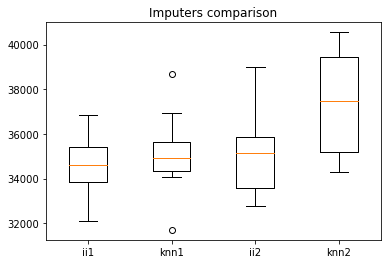

In [22]:
rmse_all = [rmse[0], rmse[1], rmse2[0], rmse2[1]]
labels = ["ii1", "knn1", "ii2", "knn2"]

fig, ax = plt.subplots()
ax.boxplot(rmse_all)
ax.set_xticklabels(labels)
plt.title("Imputers comparison")
plt.show()

Jak i warto było się spodziewać, braki w większej liczbie kolumn powodują większe odchylenie standardowe błędu. Błędy `multivariate imputor` mimo to zostawały w tym samym przedziale, zaś błędy `KNN` znacząco się pogorszyły. Ogólnie wartość błędu przy imputacji była dość duża, co może wynikać z tego, że `it_seller_rating` mało zależy od `it_quantity` i `price`.